# CH09_4_Generating LSTM recurrent Neural Network and classifying text 

- Last update: 2022.04.14.

## # dataset imports

In [1]:
from tensorflow.keras.preprocessing import sequence 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.datasets import imdb

In [2]:
# 1. Loading the IMDB data set from tensorflow 
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

# 2. Cheking out training set size
print (x_train_all.shape, y_train_all.shape)

# 4. Eliminating 2 from training set 

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    
print (x_train_all[0])    

# 5. downloading terminology dictionary

word_to_index = imdb.get_word_index()
word_to_index['movie']

# 6. Transforming integer in training set into English words string
index_to_word = {word_to_index[k]: k for k in word_to_index}
for w in x_train_all[0]: 
    print(index_to_word[w - 3], end=' ')
    

# 9. preparing verifying dataset

np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

print (">>> x_train "+str(x_train.shape)+"=\n", x_train)
print ("\n>>> y_train"+str(y_train.shape)+" =", y_train)
print ('-------------------------------')
print ("\n>>> x_val "+str(x_val.shape)+"=\n", x_val)
print ("\n>>> y_val "+str(y_val.shape)+"=", y_val)


maxlen = 100 
x_train_seq = sequence.pad_sequences(x_train, maxlen = maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

# 2. Checking out the size of alligned training set and sample 

print (">>> x_train_seq.shape, x_val_seq.shape =", x_train_seq.shape, x_val_seq.shape)
print ('\n>>> x_train_seq[0] =\n', x_train_seq[0])

# 1. One-hot incoding using tensorflow and cheking out the size of variables 

from tensorflow.keras.utils import to_categorical 

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

# 1.1. size checking 
print (">>> x_train_onehot.shape =", x_train_onehot.shape)

# 1.2. memory checking 
print (">>> x_train_onehot.nbytes = {0:10d} Byte".format(x_train_onehot.nbytes))
print (">>> x_train_onehot.nbytes = {0:10.3f} MB".format(x_train_onehot.nbytes/1024 /1024))

(25000,) (25000,)
[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]
film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all >>> x_train (20000,)=
 [list([35, 40, 27, 28, 40, 22, 83, 31, 85, 45, 24, 23, 31, 70, 31, 76, 30, 98, 32, 22, 28, 51, 75, 56, 30, 33, 97, 53, 38, 46, 53, 74, 31, 35, 23, 34, 22, 58])
 list([54, 39, 27, 35, 35, 56, 27, 29, 80, 27, 27, 46, 23, 35, 64, 86, 65, 35, 22, 63, 73, 29, 22, 82, 34, 50, 26, 21, 47, 30, 97, 83, 76, 69, 86, 31, 61, 49, 99, 85, 85, 26, 73, 81, 87, 53, 26, 53, 74, 26, 53, 62, 28, 21, 50, 44, 93, 22, 39, 34, 21, 45, 87, 20, 32])
 list([26, 42,

In [3]:
# 1. Embedding Class importing 

from tensorflow.keras.layers import Embedding

# 2. Preparing training dataset 
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    
x_train = x_train_all[random_index[:20000]]    
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]  
y_val = y_train_all[random_index[20000:]]

# 3. Alligning sample length 

maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

## # Generating LSTM Recurrent Neural Network using Tensorflow 

In [4]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.layers import Embedding

# 1. Generating LSTM Recurrent Neural Network 

from tensorflow.keras.layers import LSTM

model_lstm = Sequential()

model_lstm.add(Embedding(1000, 32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 2. Training model 

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size =32, 
                         validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 7s 12ms/step - loss: 0.4558 - accuracy: 0.7893 - val_loss: 0.3766 - val_accuracy: 0.8400
Epoch 2/10
625/625 [==============================] - 7s 11ms/step - loss: 0.3414 - accuracy: 0.8547 - val_loss: 0.3614 - val_accuracy: 0.8446
Epoch 3/10
625/625 [==============================] - 7s 11ms/step - loss: 0.3156 - accuracy: 0.8672 - val_loss: 0.3653 - val_accuracy: 0.8424
Epoch 4/10
625/625 [==============================] - 7s 11ms/step - loss: 0.2992 - accuracy: 0.8752 - val_loss: 0.3543 - val_accuracy: 0.8414
Epoch 5/10
625/625 [==============================] - 7s 11ms/step - loss: 0.2823 - accuracy: 0.8820 - val_loss: 0.3582 - val_accuracy: 0.8456
Epoch 6/10
625/625 [==============================] - 7s 11ms/step - loss: 0.2683 - accuracy: 0.8867 - val_loss: 0.3712 - val_accuracy: 0.8380
Epoch 7/10
625/625 [==============================] - 7s 11ms/step - loss: 0.2550 - accuracy: 0.8924 - val_loss: 0.3761 - val_accuracy: 0.8400

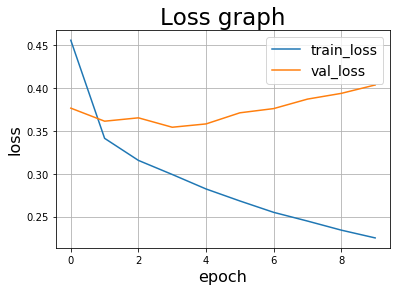

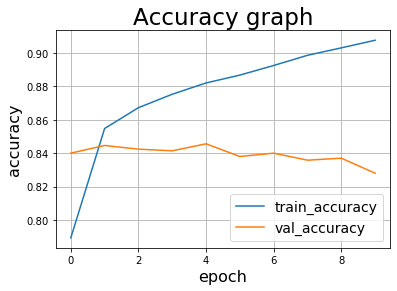

In [6]:
# 3. Plotting loss graph and accuracy graph 

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss', fontsize='16')
plt.xlabel('epoch', fontsize='16')
plt.title('Loss graph', fontsize='23')

plt.legend(['train_loss', 'val_loss'], fontsize='14')
plt.grid()
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy', fontsize='16')
plt.xlabel('epoch', fontsize='16')
plt.title('Accuracy graph', fontsize='23')

plt.legend(['train_accuracy', 'val_accuracy'], fontsize='14')
plt.grid()
plt.show()

In [7]:
# 4. Evaluate the accuracy of verification set 

loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)

print(accuracy)

0.828000009059906
